<a href="https://colab.research.google.com/github/abiaryaza/HCI-Credit-Score-Modelling-/blob/main/HCI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
data_test = pd.read_csv("application_test.csv")
data_train = pd.read_csv("application_train.csv")

In [4]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_train.drop(data_train.columns.difference(['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER',
                                               'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
                                               'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY',
                                               'AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                                               'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


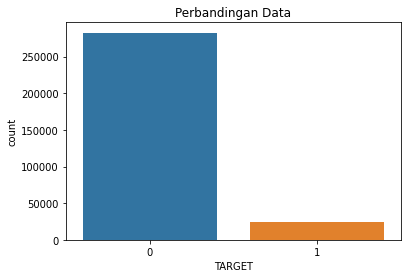

In [6]:
plt.title('Perbandingan Data')
sns.countplot(data_train['TARGET'])

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   NAME_CONTRACT_TYPE   307511 non-null  object 
 2   CODE_GENDER          307511 non-null  object 
 3   FLAG_OWN_CAR         307511 non-null  object 
 4   FLAG_OWN_REALTY      307511 non-null  object 
 5   CNT_CHILDREN         307511 non-null  int64  
 6   AMT_INCOME_TOTAL     307511 non-null  float64
 7   AMT_CREDIT           307511 non-null  float64
 8   AMT_ANNUITY          307499 non-null  float64
 9   AMT_GOODS_PRICE      307233 non-null  float64
 10  NAME_INCOME_TYPE     307511 non-null  object 
 11  NAME_EDUCATION_TYPE  307511 non-null  object 
 12  NAME_FAMILY_STATUS   307511 non-null  object 
 13  NAME_HOUSING_TYPE    307511 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 32.8+ MB


In [8]:
data_train  = data_train.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE'])

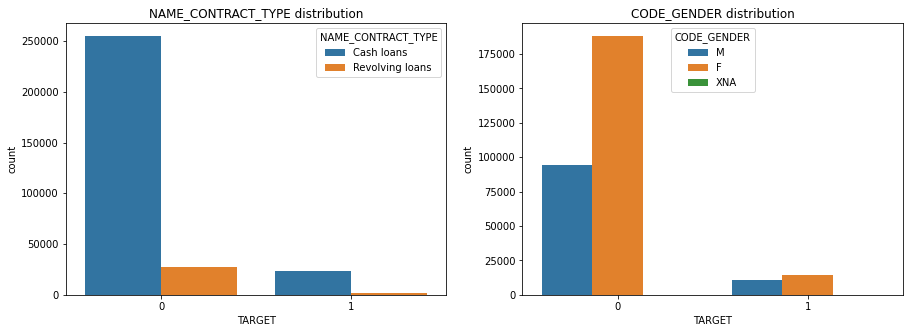

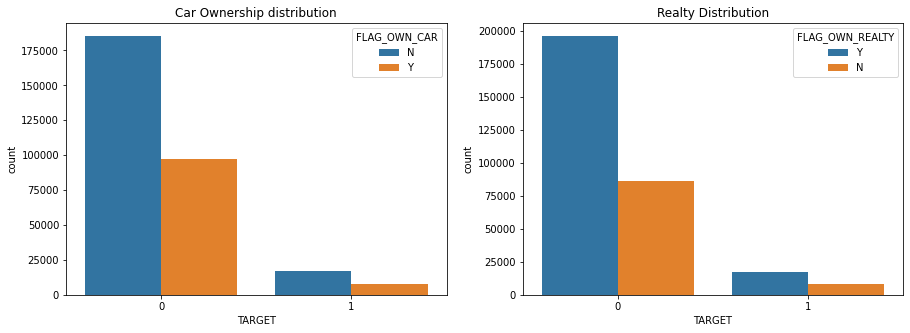

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=data_train, x='TARGET', hue="NAME_CONTRACT_TYPE", ax=ax[0]).set_title("NAME_CONTRACT_TYPE distribution");
sns.countplot(data=data_train, x='TARGET', hue='CODE_GENDER', ax=ax[1]).set_title("CODE_GENDER distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=data_train, x='TARGET', hue='FLAG_OWN_CAR', ax=ax[0]).set_title("Car Ownership distribution");
sns.countplot(data=data_train, x='TARGET', hue='FLAG_OWN_REALTY', ax=ax[1]).set_title("Realty Distribution");

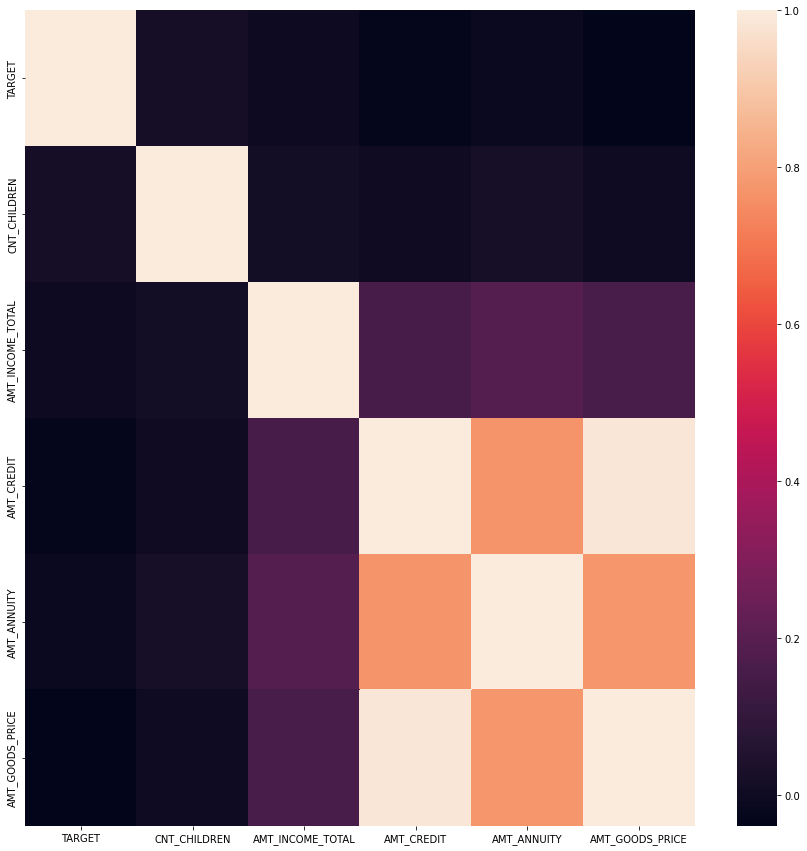

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data_train.corr())

In [11]:
categorical_cols = [col for col in data_train.select_dtypes(include='object').columns.tolist()]

In [12]:
onehot = pd.get_dummies(data_train[categorical_cols], drop_first=True)
onehot.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [22]:
data_latih = pd.concat([onehot, data_train[['CNT_CHILDREN',	'AMT_INCOME_TOTAL',	'AMT_CREDIT','TARGET']]], axis=1)

In [23]:
data_latih.isnull().sum()

NAME_CONTRACT_TYPE_Revolving loans                   0
CODE_GENDER_M                                        0
CODE_GENDER_XNA                                      0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Maternity leave                     0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Unemployed                          0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCATION_TYPE_Lower secondary                  0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
NAME_FAMILY_STATUS_Married                           0
NAME_FAMILY_STATUS_Separated                         0
NAME_FAMIL

In [24]:
data_latih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307221 non-null  int64  
 1   NAME_CONTRACT_TYPE   307221 non-null  object 
 2   CODE_GENDER          307221 non-null  object 
 3   FLAG_OWN_CAR         307221 non-null  object 
 4   FLAG_OWN_REALTY      307221 non-null  object 
 5   CNT_CHILDREN         307221 non-null  int64  
 6   AMT_INCOME_TOTAL     307221 non-null  float64
 7   AMT_CREDIT           307221 non-null  float64
 8   AMT_ANNUITY          307221 non-null  float64
 9   AMT_GOODS_PRICE      307221 non-null  float64
 10  NAME_INCOME_TYPE     307221 non-null  object 
 11  NAME_EDUCATION_TYPE  307221 non-null  object 
 12  NAME_FAMILY_STATUS   307221 non-null  object 
 13  NAME_HOUSING_TYPE    307221 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 43.2+ MB


In [25]:
X = data_latih.drop('TARGET', axis=1)
y = data_latih['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [27]:
def finalize(X,y,model): #Menampilkan hasil evaluasi dan menyimpan model (optional)

#X = data text yang sudah dilakukan vectorization
#y = label
#model = Objek model yang sudah dilakukan training
  y_predict = model.predict(X)
  y_prob = model.predict_proba(X)[:,1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  roc_auc = auc(fpr, tpr)
  acc = accuracy_score(y,y_predict)
  prec = precision_score(y,y_predict)
  rec = recall_score(y,y_predict)
  f1 = f1_score(y,y_predict)
  cm = confusion_matrix(y, y_predict)
  tn, fp, fn, tp = cm.ravel()

  print('================================================\nEvaluasi Hasil Model\n================================================\n')
  print('Dengan Classification Report:\n\n', classification_report(y,y_predict))
  print('================================================')
  print('\nDengan Confusion Matrix:\n\n',cm)
  print('\nTrue Positif   : ', tp)
  print('True Negatif   : ', tn)
  print('False Positif  : ', fp)
  print('False Negatif  : ', fn)
  print('\n================================================')
  print('\nDengan Beberapa Metrik:')
  print('\nAUC      : ', roc_auc)
  print('Akurasi  : ', acc)
  print('Presisi  : ', prec)
  print('Recall   : ', rec)
  print('F1-score : ', f1)

In [28]:
lr = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [29]:
finalize(X_test,y_test,lr)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluasi Hasil Model

Dengan Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84583
           1       0.00      0.00      0.00      7584

    accuracy                           0.92     92167
   macro avg       0.46      0.50      0.48     92167
weighted avg       0.84      0.92      0.88     92167


Dengan Confusion Matrix:

 [[84583     0]
 [ 7584     0]]

True Positif   :  0
True Negatif   :  84583
False Positif  :  0
False Negatif  :  7584


Dengan Beberapa Metrik:

AUC      :  0.5219480170614628
Akurasi  :  0.9177145833107294
Presisi  :  0.0
Recall   :  0.0
F1-score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.naive_bayes import BernoulliNB

In [31]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [32]:
finalize(X_test,y_test,nb)

Evaluasi Hasil Model

Dengan Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84583
           1       0.00      0.00      0.00      7584

    accuracy                           0.92     92167
   macro avg       0.46      0.50      0.48     92167
weighted avg       0.84      0.92      0.88     92167


Dengan Confusion Matrix:

 [[84582     1]
 [ 7584     0]]

True Positif   :  0
True Negatif   :  84582
False Positif  :  1
False Negatif  :  7584


Dengan Beberapa Metrik:

AUC      :  0.6167176156109813
Akurasi  :  0.9177037334403854
Presisi  :  0.0
Recall   :  0.0
F1-score :  0.0
